In [6]:
import pandas as pd
import numpy as np

import seaborn as sns

import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
pacu_df = pd.read_csv('pacu_query_results.csv')

pacu_df['InternalTemperature'] = pacu_df['InternalTemperature'].astype(str)

pacu_df.replace(to_replace="39.4", value="376.0", inplace=True)

# Figure 1: Head of DF

In [99]:
pacu_df.head()

,Patient_ID,InternalTemperature,SurfaceTemperature,OxygenSat,BloodPressure,ComfortLevel,Vitals_RecordTime,DischargeLocation
0,O16BWD,37.2,35.5,88.0,118/80,poor,2019-10-11 00:00:00,Floor 5
1,O16BWD,37.4,36.7,93.0,122/74,poor,2019-10-11 01:00:00,Floor 5
2,O16BWD,37.7,35.8,NaN,119/72,poor,2019-10-11 02:00:00,Floor 5
3,O16BWD,38.5,36.7,100.0,118/78,poor,2019-10-11 03:00:00,Floor 5
4,O16BWD,36.0,35.2,NaN,116/76,poor,2019-10-11 04:00:00,Floor 5


# Figure 2: Dtypes

In [100]:
pacu_df.dtypes

Patient_ID              object
InternalTemperature     object
SurfaceTemperature     float64
OxygenSat              float64
BloodPressure           object
ComfortLevel            object
Vitals_RecordTime       object
DischargeLocation       object
dtype: object

In [101]:
pacu_df['InternalTemperature'] = pacu_df['InternalTemperature'].astype(float)

# Figure 3: BloodPressure columns split into Diastolic and Systolic

In [102]:
pacu_df[['SystolicBloodPressure', 'DiastolicBloodPressure']] = pacu_df['BloodPressure'].str.split(pat="/", expand=True)
pacu_df.head()

,Patient_ID,InternalTemperature,SurfaceTemperature,OxygenSat,BloodPressure,ComfortLevel,Vitals_RecordTime,DischargeLocation,SystolicBloodPressure,DiastolicBloodPressure
0,O16BWD,37.2,35.5,88.0,118/80,poor,2019-10-11 00:00:00,Floor 5,118,80
1,O16BWD,37.4,36.7,93.0,122/74,poor,2019-10-11 01:00:00,Floor 5,122,74
2,O16BWD,37.7,35.8,NaN,119/72,poor,2019-10-11 02:00:00,Floor 5,119,72
3,O16BWD,38.5,36.7,100.0,118/78,poor,2019-10-11 03:00:00,Floor 5,118,78
4,O16BWD,36.0,35.2,NaN,116/76,poor,2019-10-11 04:00:00,Floor 5,116,76


# Figure 4: Value Counts of InternalTemperature column

In [103]:
pacu_df['InternalTemperature'].value_counts().sort_index(ascending=False) 

376.0     1
39.0      1
38.8      1
38.7      1
38.6      1
38.5      4
38.3      1
38.2      5
38.1      1
38.0      2
37.9      1
37.8      5
37.7      4
37.6      9
37.5      4
37.4      7
37.3      8
37.2      9
37.1      3
37.0     10
36.9     10
36.8      9
36.7      5
36.6      6
36.5     11
36.4      3
36.3      9
36.2      4
36.1      3
36.0      6
35.9      2
35.8      2
35.7      4
35.6      1
35.5      1
35.3      3
35.2      1
35.1      1
Name: InternalTemperature, dtype: int64

# Figure 5: pacu_df describe

In [104]:
pacu_df.describe()

,InternalTemperature,SurfaceTemperature,OxygenSat
count,159.000000,176.000000,158.000000
mean,39.083019,36.126705,95.303797
std,26.899982,0.739824,3.746266
min,35.100000,34.000000,85.000000
25%,36.450000,35.600000,92.000000
50%,36.900000,36.100000,95.000000
75%,37.500000,36.700000,99.000000
max,376.000000,38.100000,100.000000


# Figure 6: pacu_df describe to matplotlib

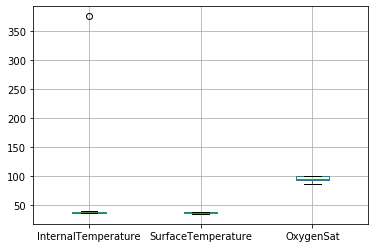

In [105]:
pacu_df.boxplot(column=pacu_df.describe().columns.tolist()) 

# Figure 7: Seaborn missingness heatmap

In [106]:
sample = pacu_df.sample(20)
sample['BloodPressure'] = np.nan
sample['SystolicBloodPressure'] = np.nan
sample['DiastolicBloodPressure'] = np.nan
sample['Vitals_RecordTime'] = np.nan

pacu_df = pd.concat([pacu_df.reset_index(),sample], sort=False)
pacu_df = pacu_df.sample(frac=1)

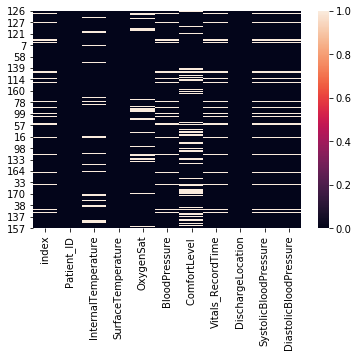

In [107]:
sns.heatmap( pd.isnull( pacu_df ) )

# Figure 8: Missingno heat map

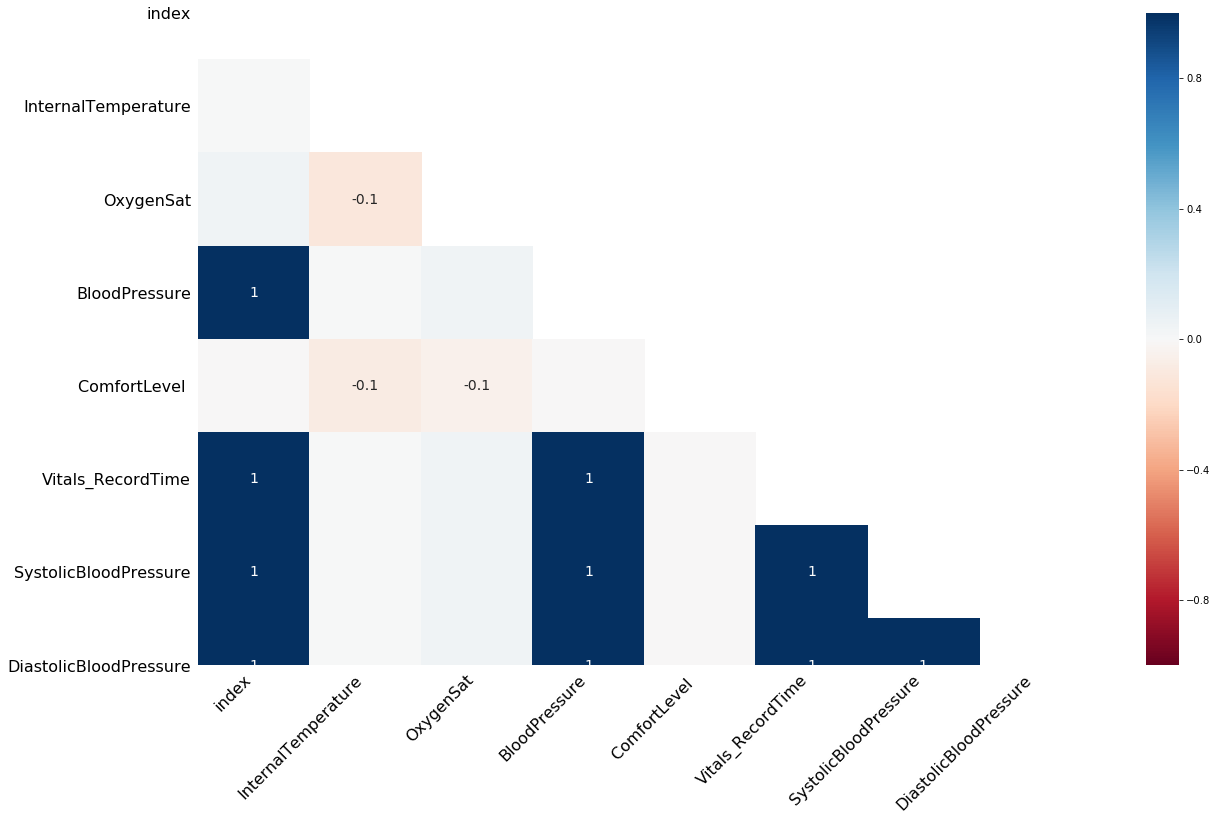

In [108]:
msno.heatmap(pacu_df)

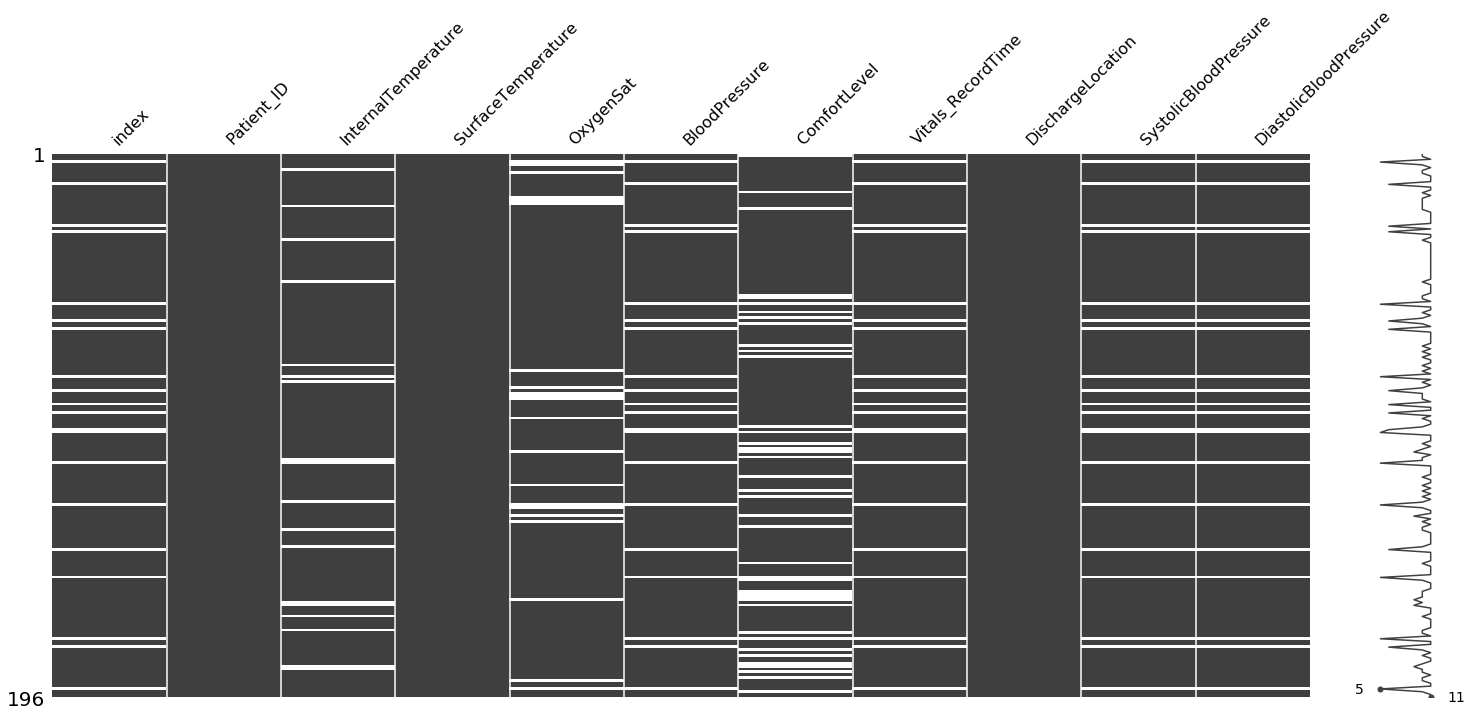

In [110]:
msno.matrix(pacu_df)

# Figure 9: Non-tidy DataFrame

In [115]:
non_tidy = pd.DataFrame(data={
    'patient_id':['patient1','patient2','patient3','patient4'],
    'timepoint_1':[6.5, 7.2, 5.8, 4.9],
    'timepoint_2':[6.0, 7.5, 5.5, 4.0],
    'timepoint_3':[7.1, 8.0, 4.9, 5.0]
})

non_tidy

,patient_id,timepoint_1,timepoint_2,timepoint_3
0,patient1,6.5,6.0,7.1
1,patient2,7.2,7.5,8.0
2,patient3,5.8,5.5,4.9
3,patient4,4.9,4.0,5.0


# Figure 10: Tidy DataFrame

In [116]:
pd.melt(frame=non_tidy, id_vars='patient_id', value_vars=['timepoint_1','timepoint_2','timepoint_3'])

,patient_id,variable,value
0,patient1,timepoint_1,6.5
1,patient2,timepoint_1,7.2
2,patient3,timepoint_1,5.8
3,patient4,timepoint_1,4.9
4,patient1,timepoint_2,6.0
5,patient2,timepoint_2,7.5
6,patient3,timepoint_2,5.5
7,patient4,timepoint_2,4.0
8,patient1,timepoint_3,7.1
9,patient2,timepoint_3,8.0


# Figure 11: Un-pivoted DataFrame

In [154]:
unpivoted_df = pd.DataFrame(data={
    'patient_id':['patient1','patient2','patient1','patient2'],
    'vital_sign':['BloodPressure','BloodPressure','Temperature','Temperature'],
    'value':["128/80", "130/82", 37.0, 37.9]
})

unpivoted_df

,patient_id,vital_sign,value
0,patient1,BloodPressure,128/80
1,patient2,BloodPressure,130/82
2,patient1,Temperature,37
3,patient2,Temperature,37.9


In [155]:
unpivoted_df.pivot(index='patient_id', 
               columns='vital_sign', values='value',)

vital_sign,BloodPressure,Temperature
patient_id,,
patient1,128/80,37
patient2,130/82,37.9
